In [ ]:
%pip install matplotlib

# chapter 13

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# parámetros de la distribución
a, b = 300, 40000 - 300

# rango de valores de probabilidad
xs = np.arange(0.005, 0.01, 0.00001)

# densidad de la Beta en esos puntos
ys = beta.pdf(xs, a, b)

# graficar
plt.figure(figsize=(8, 4))
plt.plot(xs, ys, linewidth=3)
plt.title("PDF Beta(300, 39700)")
plt.xlabel("probability of subscription")
plt.ylabel("density")
plt.grid(alpha=0.3)
plt.show()


In [ ]:
beta.cdf(0.0065, a, b)

In [ ]:
# qbeta(0.999,300,39700)
beta.ppf(0.999, 300, 39700)

In [ ]:
# graficar CDF
# rango de valores de probabilidad
xs = np.arange(0.005, 0.01, 0.00001)

ys = beta.cdf(xs, a, b)

# graficar
plt.figure(figsize=(8, 4))
plt.plot(xs, ys, linewidth=3)
plt.title("CDF Beta(300, 39700)")
plt.xlabel("probability of subscription")
plt.ylabel("cumulative probability")
plt.grid(alpha=0.3)
plt.show()


In [ ]:
# graficar cuantiles
# rango de valores de probabilidad
xs = np.arange(0.001, 0.999, 0.00001)

ys = beta.ppf(xs, a, b)

# graficar
plt.figure(figsize=(8, 4))
plt.plot(xs, ys, linewidth=3)
plt.title("PPF Beta(300, 39700)")
plt.xlabel("cumulative probability")
plt.ylabel("probability of subscription")
plt.grid(alpha=0.3)
plt.show()


In [ ]:
"""
Returning to the task of measuring snowfall from Chapter 10, say you have the following measurements (in inches) of snowfall:
7.8, 9.4, 10.0, 7.9, 9.4, 7.0, 7.0, 7.1, 8.9, 7.4
What is your 99.9 percent confidence interval for the true value of snowfall?

"""

import numpy as np
from scipy.stats import norm

# datos
snow = np.array([7.8, 9.4, 10.0, 7.9, 9.4, 7.0, 7.0, 7.1, 8.9, 7.4])

# media y desvío estándar
snow_mean = np.mean(snow)
snow_sd = np.std(snow, ddof=1)   # ddof=1 para usar n-1 (igual que R)

# intervalos de confianza del 99.9%
lower = norm.ppf(0.0005, loc=snow_mean, scale=snow_sd)
upper = norm.ppf(0.9995, loc=snow_mean, scale=snow_sd)

print(f"Mean: {snow_mean:.2f}, SD: {snow_sd:.2f}")
print(f"99.9% Confidence Interval: ({lower:.2f}, {upper:.2f})")

In [ ]:
"""
A child is going door to door selling candy bars. So far she has visited 30 houses and sold 10 candy bars. 
She will visit 40 more houses today. 
What is the 95 percent confidence interval for how many candy bars she will sell the rest of the day?
"""
n = 30

a = 10
b = n - a



lower_percent = beta.ppf(0.025, a, b)
upper_percent = beta.ppf(0.975, a, b)

future_houses = 40
lower_sells = lower_percent * future_houses
upper_sells = upper_percent * future_houses

print(f"95% Confidence Interval percents: ({lower_percent:.2f}, {upper_percent:.2f})")
print(f"95% Confidence Interval sells: ({lower_sells}, {upper_sells})")

# chapter 14

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# datos observados
mails_opened = 300
clicks = 86

# 1) "solo datos" -> Beta(k, n-k)
a_data = clicks
b_data = mails_opened - clicks

# 2) prior Beta(1, 41)
a_prior, b_prior = 1, 41

# posterior con prior Beta(1,41): Beta(a0 + k, b0 + n - k)
a_post = a_prior + clicks
b_post = b_prior + (mails_opened - clicks)

# rango de valores de probabilidad
xs = np.arange(0.0001, 1, 0.0001)

# densidades
ys_data = beta.pdf(xs, a_data, b_data)      # solo datos
ys_prior = beta.pdf(xs, a_prior, b_prior)   # prior
ys_post = beta.pdf(xs, a_post, b_post)      # posterior (prior + datos)

# graficar
plt.figure(figsize=(8, 4))
plt.plot(xs, ys_data, linewidth=2, label=f"Solo datos: Beta({a_data}, {b_data})")
#plt.plot(xs, ys_prior, linewidth=2, linestyle="--", label=f"Prior: Beta({a_prior}, {b_prior})")
plt.plot(xs, ys_post, linewidth=3, label=f"Posterior: Beta({a_post}, {b_post})")

plt.title("Posterior con prior Beta(1, 41)")
plt.xlabel("probability of click")
plt.ylabel("density")
plt.grid(alpha=0.3)
plt.legend()
plt.show()


## Ejercicios

1. Suppose you’re playing air hockey with some friends and flip a coin to see who starts with the puck. After playing 12 times, you realize that the friend who brings the coin almost always seems to go first: 9 out of 12 times. Some of your other friends start to get suspicious. Define prior probability distributions for the following beliefs:
- One person who weakly believes that the friend is cheating and the true rate of coming up heads is closer to 70 percent.
- One person who very strongly trusts that the coin is fair and provided a 50 percent chance of coming up heads.
- One person who strongly believes the coin is biased to come up heads 70 percent of the time.


2. To test the coin, you flip it 20 more times and get 9 heads and 11 tails. Using the priors you calculated in the previous question, what are the updated posterior beliefs in the true rate of flipping a heads in terms of the 95 percent confidence interval?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# datos observados
heads = 9
throws = 12


# 1) "solo datos" -> Beta(k, n-k)
a_data = heads
b_data = throws - heads

# 2) prior Beta(1, 41)

prior_weak_cheat_a, prior_weak_cheat_b = 7, 3
prior_strong_fair_a, prior_strong_fair_b = 1000, 1000
prior_strong_cheat_a, prior_strong_cheat_b = 70, 30

# posterior con prior 
a_post_1, b_post_1 = a_data + prior_weak_cheat_a, b_data + prior_weak_cheat_b
a_post_2, b_post_2 = a_data + prior_strong_fair_a, b_data + prior_strong_fair_b
a_post_3, b_post_3 = a_data + prior_strong_cheat_a, b_data + prior_strong_cheat_b


# rango de valores de probabilidad
xs = np.arange(0.0001, 1, 0.0001)

# densidades
ys_data = beta.pdf(xs, a_data, b_data)      # solo datos
ys_post_1 = beta.pdf(xs, a_post_1, b_post_1)
ys_post_2 = beta.pdf(xs, a_post_2, b_post_2)
ys_post_3 = beta.pdf(xs, a_post_3, b_post_3)


# graficar
plt.figure(figsize=(8, 4))
plt.plot(xs, ys_data, linewidth=2, label=f"Solo datos: Beta({a_data}, {b_data})")
plt.plot(xs, ys_post_1, linewidth=2, label=f"prior: weakly believes cheating")
plt.plot(xs, ys_post_2, linewidth=2, label=f"prior: strongly believes fair")
plt.plot(xs, ys_post_3, linewidth=2, label=f"prior: strongly believes cheating")



plt.title("Posterior with different believes)")
plt.xlabel("probability of heads")
plt.ylabel("density")
plt.grid(alpha=0.3)
plt.legend()
plt.show()


In [ ]:
print("a")

# chapter 15

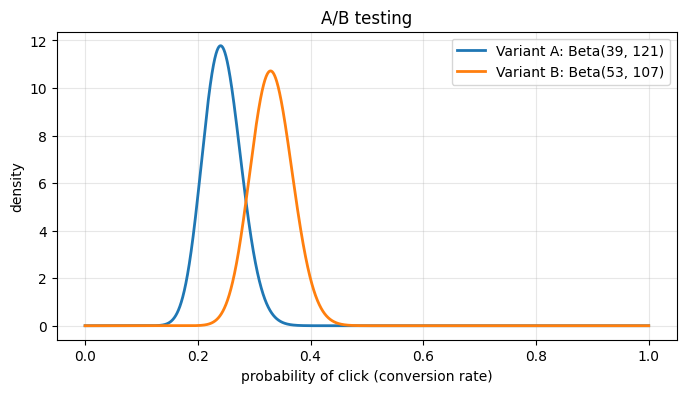

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# prior: se clickea el 30% de los mails
prior_alfa = 3
prior_beta = 7

total_population = 600
testing_population = 300

# A/B test "remover imagen" con 300 usuarios (150 en cada grupo)
# Variant A: with image
a_alfa = 36
a_beta = 114

# Variant B: without image
b_alfa = 50
b_beta = 100

# 2) prior Beta(1, 41)
a_prior, b_prior = 1, 41

# posterior con prior 
a_alfa_posterior = prior_alfa + a_alfa
a_beta_posterior = prior_beta + a_beta

b_alfa_posterior = prior_alfa + b_alfa
b_beta_posterior = prior_beta + b_beta

# rango de valores de probabilidad
xs = np.arange(0.0001, 1, 0.0001)

# densidades
ys_a = beta.pdf(xs, a_alfa_posterior, a_beta_posterior)
ys_b = beta.pdf(xs, b_alfa_posterior, b_beta_posterior)

# graficar
plt.figure(figsize=(8, 4))
plt.plot(xs, ys_a, linewidth=2, label=f"Variant A: Beta({a_alfa_posterior}, {a_beta_posterior})")
plt.plot(xs, ys_b, linewidth=2, label=f"Variant B: Beta({b_alfa_posterior}, {b_beta_posterior})")


plt.title("A/B testing")
plt.xlabel("probability of click (conversion rate)")
plt.ylabel("density")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

In [4]:
trials  = 100_000
a_samples = beta.rvs(a_alfa_posterior, a_beta_posterior, size=trials)
b_samples = beta.rvs(b_alfa_posterior, b_beta_posterior, size=trials)

In [5]:
a_samples

array([0.30904307, 0.2499415 , 0.26447124, ..., 0.22279446, 0.25779741,
       0.224714  ], shape=(100000,))

In [8]:
p_b_superior = sum(b_samples > a_samples) / trials
p_b_superior

np.float64(0.95956)

In [10]:
how_much_better = b_samples/a_samples
how_much_better

array([1.08613651, 1.42422758, 1.16524797, ..., 1.56769099, 1.3622862 ,
       1.64827651], shape=(100000,))

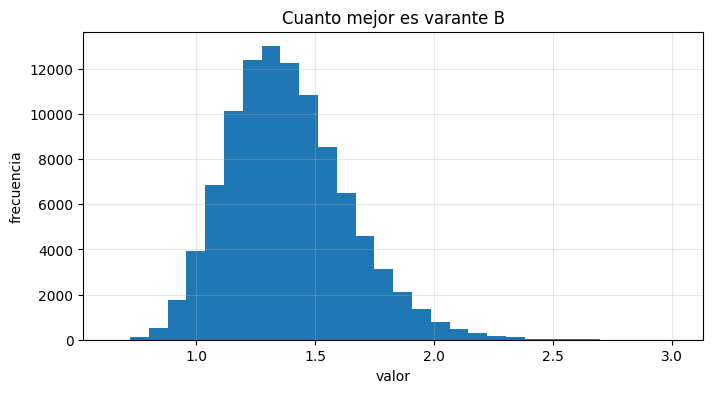

In [11]:
plt.figure(figsize=(8, 4))
plt.hist(how_much_better, bins=30)
plt.title("Cuánto mejor es varante B")
plt.xlabel("valor")
plt.ylabel("frecuencia")
plt.grid(alpha=0.3)
plt.show()